In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**Kinetic models**

*PFO, PSO and IPD*

In [2]:
# ================================================================
# Pseudo-First-Order (PFO) Model
# ================================================================

def pfo_model(t, qe, k1):
    """
    Pseudo-First-Order (PFO) kinetic model.
    Inputs:
        t (array): Time (min).
        qe (float): Equilibrium adsorption capacity (mg/g).
        k1 (float): PFO rate constant (1/min).
    Returns:
        qt (array): Adsorbed amount at time t (mg/g).
    """
    return qe * (1 - np.exp(-k1 * t))


def pfo_fit(t, qt):
    """
    Fits adsorption kinetic data to the PFO model.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
    Returns:
        qe (float): Equilibrium adsorption capacity (mg/g).
        k1 (float): PFO rate constant (1/min).
        R2 (float): Coefficient of determination.
    """
    # Initial guesses for qe and k1
    qe_guess = max(qt)
    k1_guess = 0.01

    # Perform non-linear least squares fitting
    params, _ = curve_fit(pfo_model, t, qt, p0=[qe_guess, k1_guess])
    qe, k1 = params

    # Calculate R²
    qt_pred = pfo_model(np.array(t), qe, k1)
    ss_res = np.sum((np.array(qt) - qt_pred) ** 2)
    ss_tot = np.sum((np.array(qt) - np.mean(qt)) ** 2)
    R2 = 1 - (ss_res / ss_tot)

    return qe, k1, R2


def pfo_plot(t, qt, qe, k1):
    """
    Plots the PFO model fit.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
        qe (float): Equilibrium adsorption capacity (mg/g).
        k1 (float): PFO rate constant (1/min).
    """
    t_fit = np.linspace(min(t), max(t), 100)
    qt_fit = pfo_model(t_fit, qe, k1)

    plt.scatter(t, qt, color='blue', label='Data')
    plt.plot(t_fit, qt_fit, 'r--', label='PFO Fit')
    plt.xlabel('Time (min)')
    plt.ylabel('qt (mg/g)')
    plt.title('Pseudo-First-Order (PFO) Model')
    plt.legend()
    plt.grid()
    plt.show()


# ================================================================
# Non-linear model for PFO only
# ================================================================



In [3]:
#Data imports

kinetic_cv = pd.read_csv('kinetic_CV_data.csv', index_col=None)

kinetic_cv.head(3)

,time,Qt_COOH,Qt_SH,Qt_MSN
0,5,81.933749,30.739233,25.743549
1,10,85.681509,39.259904,27.013898
2,15,88.154488,48.133313,31.114387


In [4]:
t = kinetic_cv.time
qt_c = kinetic_cv.Qt_COOH #for MSN-COOH
qt_s = kinetic_cv.Qt_SH # for MSN-SH
qt_n = kinetic_cv.Qt_MSN # for MSN

# MSN-COOH

PFO for MSN-COOH: qe = 91.14 mg/g, k1 = 0.436 1/min, R² = 0.663


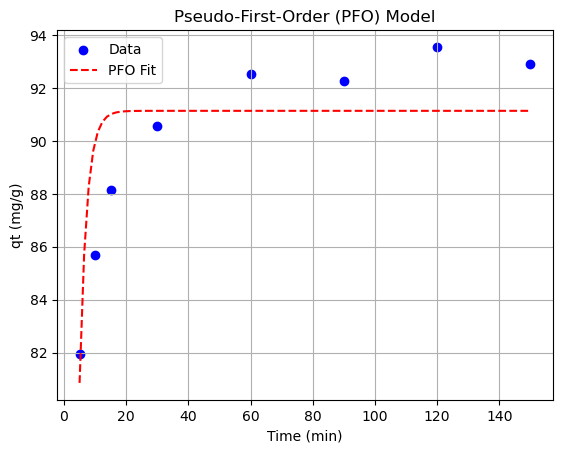

In [5]:
# ================================================================
# Implementation of PFO on MSN-COOH in CV dye
# ================================================================
qe_pfo, k1, R2_pfo = pfo_fit(t, qt_c)
print(f"PFO for MSN-COOH: qe = {qe_pfo:.2f} mg/g, k1 = {k1:.3f} 1/min, R² = {R2_pfo:.3f}")
pfo_plot(t, qt_c, qe_pfo, k1)


**Use linearised equations for other kinetic models**

In [6]:
# ================================================================
# Pseudo-First-Order (PFO) Model (Linearized Form)
# ================================================================

def pfo_linear_fit(t, qt):
    """
    Fits adsorption kinetic data to the linearized PFO model.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
    Returns:
        qe (float): Equilibrium adsorption capacity (mg/g).
        k1 (float): PFO rate constant (1/min).
        R2 (float): Coefficient of determination.
    """
    # Linearized PFO equation: ln(qe - qt) = ln(qe) - k1 * t
    qe_guess = max(qt)  # Initial guess for qe
    y = np.log(qe_guess - np.array(qt))  # ln(qe - qt)
    x = np.array(t)  # Time (t)

    # Perform linear regression
    slope, intercept = np.polyfit(x, y, 1)
    k1 = -slope  # PFO rate constant (1/min)
    qe = np.exp(intercept)  # Equilibrium adsorption capacity (mg/g)

    # Calculate R²
    y_pred = slope * x + intercept
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - (ss_res / ss_tot)

    return qe, k1, R2


def pfo_linear_plot(t, qt, qe, k1):
    """
    Plots the linearized PFO model fit.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
        qe (float): Equilibrium adsorption capacity (mg/g).
        k1 (float): PFO rate constant (1/min).
    """
    y = np.log(qe - np.array(qt))  # ln(qe - qt)
    y_fit = np.log(qe) - k1 * np.array(t)  # Fitted line

    plt.scatter(t, y, color='blue', label='Data')
    plt.plot(t, y_fit, 'r--', label='PFO Linear Fit')
    plt.xlabel('Time (min)')
    plt.ylabel('ln(qe - qt)')
    plt.title('Linearized Pseudo-First-Order (PFO) Model')
    plt.legend()
    plt.grid()
    plt.show()


# ================================================================
# Pseudo-Second-Order (PSO) Model (Linearized Form)
# ================================================================

def pso_linear_fit(t, qt):
    """
    Fits adsorption kinetic data to the linearized PSO model.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
    Returns:
        qe (float): Equilibrium adsorption capacity (mg/g).
        k2 (float): PSO rate constant (g/mg/min).
        R2 (float): Coefficient of determination.
    """
    # Linearized PSO equation: t/qt = 1/(k2 * qe^2) + t/qe
    y = np.array(t) / np.array(qt)  # t/qt
    x = np.array(t)  # Time (t)

    # Perform linear regression
    slope, intercept = np.polyfit(x, y, 1)
    qe = 1 / slope  # Equilibrium adsorption capacity (mg/g)
    k2 = slope**2 / intercept  # PSO rate constant (g/mg/min)

    # Calculate R²
    y_pred = slope * x + intercept
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - (ss_res / ss_tot)

    return qe, k2, R2


def pso_linear_plot(t, qt, qe, k2):
    """
    Plots the linearized PSO model fit.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
        qe (float): Equilibrium adsorption capacity (mg/g).
        k2 (float): PSO rate constant (g/mg/min).
    """
    y = np.array(t) / np.array(qt)  # t/qt
    y_fit = (1 / (k2 * qe**2)) + (np.array(t) / qe)  # Fitted line

    plt.scatter(t, y, color='blue', label='Data')
    plt.plot(t, y_fit, 'r--', label='PSO Linear Fit')
    plt.xlabel('Time (min)')
    plt.ylabel('t/qt (min·g/mg)')
    plt.title('Linearized Pseudo-Second-Order (PSO) Model')
    plt.legend()
    plt.grid()
    plt.show()


# ================================================================
# Intraparticle Diffusion (IPD) Model (Linearized Form)
# ================================================================

def ipd_linear_fit(t, qt):
    """
    Fits adsorption kinetic data to the linearized IPD model.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
    Returns:
        kid (float): IPD rate constant (mg/g/min^0.5).
        C (float): Intercept related to boundary layer thickness (mg/g).
        R2 (float): Coefficient of determination.
    """
    # Linearized IPD equation: qt = kid * sqrt(t) + C
    x = np.sqrt(t)  # sqrt(t)
    y = np.array(qt)  # qt

    # Perform linear regression
    slope, intercept = np.polyfit(x, y, 1)
    kid = slope  # IPD rate constant (mg/g/min^0.5)
    C = intercept  # Intercept (mg/g)

    # Calculate R²
    y_pred = slope * x + intercept
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - (ss_res / ss_tot)

    return kid, C, R2


def ipd_linear_plot(t, qt, kid, C):
    """
    Plots the linearized IPD model fit.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
        kid (float): IPD rate constant (mg/g/min^0.5).
        C (float): Intercept related to boundary layer thickness (mg/g).
    """
    x = np.sqrt(t)  # sqrt(t)
    y = np.array(qt)  # qt
    y_fit = kid * x + C  # Fitted line

    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, y_fit, 'r--', label='IPD Linear Fit')
    plt.xlabel('sqrt(t) (min^0.5)')
    plt.ylabel('qt (mg/g)')
    plt.title('Linearized Intraparticle Diffusion (IPD) Model')
    plt.legend()
    plt.grid()
    plt.show()


PFO: qe = 91.14 mg/g, k1 = 0.436 1/min, R² = 0.663


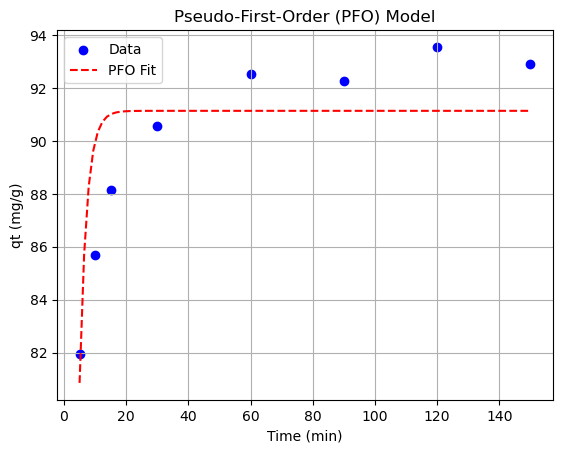

PSO: qe = 93.66 mg/g, k2 = 0.012 g/mg/min, R² = 1.000


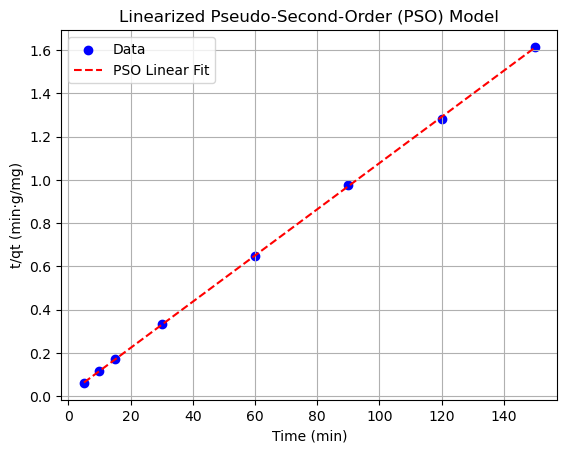

IPD: kid = 0.971 mg/g/min^0.5, C = 83.00 mg/g, R² = 0.785


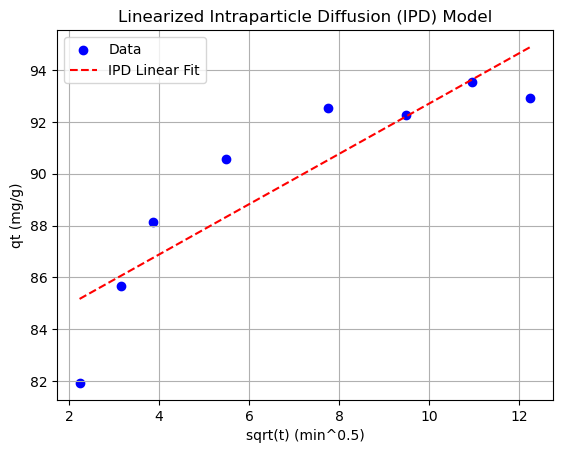

In [7]:
# ================================================================
# Implementation of the three kinetic models on MSN-COOH in CV dyes
# ================================================================

# #  Fit and visualize PFO model
qe_pfo, k1, R2_pfo = pfo_fit(t, qt_c)
print(f"PFO: qe = {qe_pfo:.2f} mg/g, k1 = {k1:.3f} 1/min, R² = {R2_pfo:.3f}")
pfo_plot(t, qt_c, qe_pfo, k1)

# Fit and visualize PSO model
qe_pso, k2, R2_pso = pso_linear_fit(t, qt_c)
print(f"PSO: qe = {qe_pso:.2f} mg/g, k2 = {k2:.3f} g/mg/min, R² = {R2_pso:.3f}")
pso_linear_plot(t, qt_c, qe_pso, k2)

# Fit and visualize IPD model
kid, C, R2_ipd = ipd_linear_fit(t, qt_c)
print(f"IPD: kid = {kid:.3f} mg/g/min^0.5, C = {C:.2f} mg/g, R² = {R2_ipd:.3f}")
ipd_linear_plot(t, qt_c, kid, C)

# MSN-COOH

MSN-COOH
PFO: qe = 91.14 mg/g, k1 = 0.436 1/min, R² = 0.663


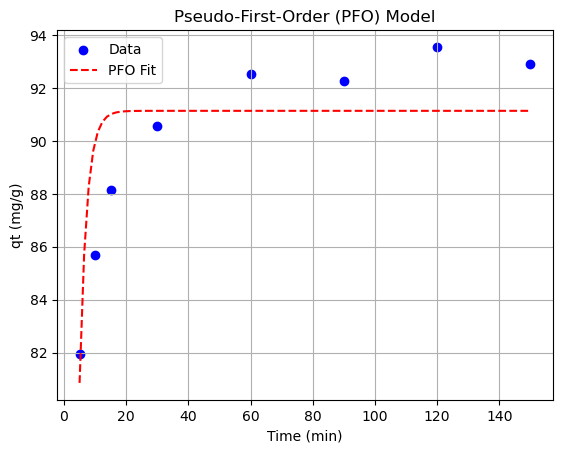

PSO: qe = 93.66 mg/g, k2 = 0.012 g/mg/min, R² = 1.000


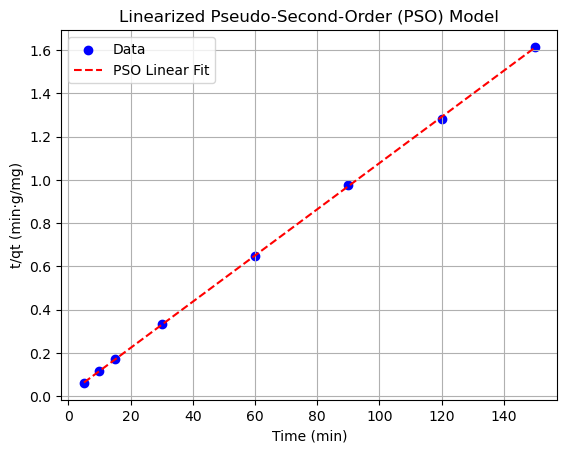

IPD: kid = 0.971 mg/g/min^0.5, C = 83.00 mg/g, R² = 0.785


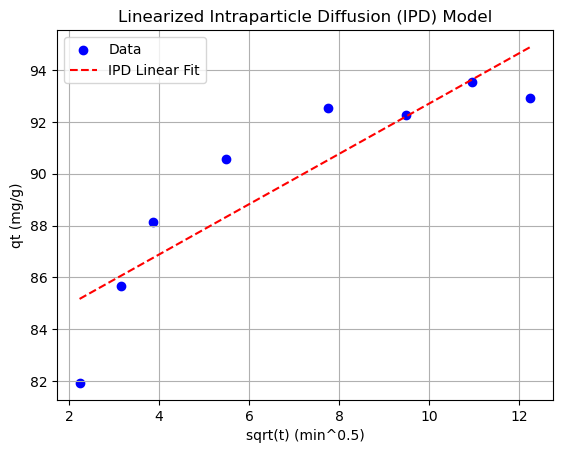

In [8]:
# Fit and visualize PFO model
qe_pfo, k1, R2_pfo = pfo_fit(t, qt_c)
print("MSN-COOH")
print(f"PFO: qe = {qe_pfo:.2f} mg/g, k1 = {k1:.3f} 1/min, R² = {R2_pfo:.3f}")
pfo_plot(t, qt_c, qe_pfo, k1)

# Fit and visualize PSO model
qe_pso, k2, R2_pso = pso_linear_fit(t, qt_c)
print(f"PSO: qe = {qe_pso:.2f} mg/g, k2 = {k2:.3f} g/mg/min, R² = {R2_pso:.3f}")
pso_linear_plot(t, qt_c, qe_pso, k2)

# Fit and visualize IPD model
kid, C, R2_ipd = ipd_linear_fit(t, qt_c)
print(f"IPD: kid = {kid:.3f} mg/g/min^0.5, C = {C:.2f} mg/g, R² = {R2_ipd:.3f}")
ipd_linear_plot(t, qt_c, kid, C)

# MSN-SH

MSN-SH
PFO: qe = 85.43 mg/g, k1 = 0.055 1/min, R² = 0.934


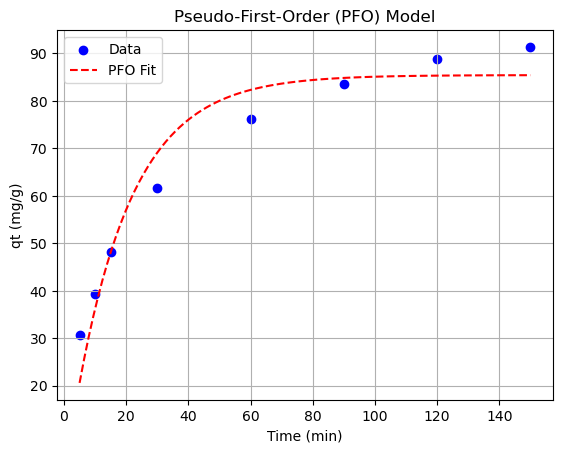

PSO: qe = 99.82 mg/g, k2 = 0.001 g/mg/min, R² = 0.998


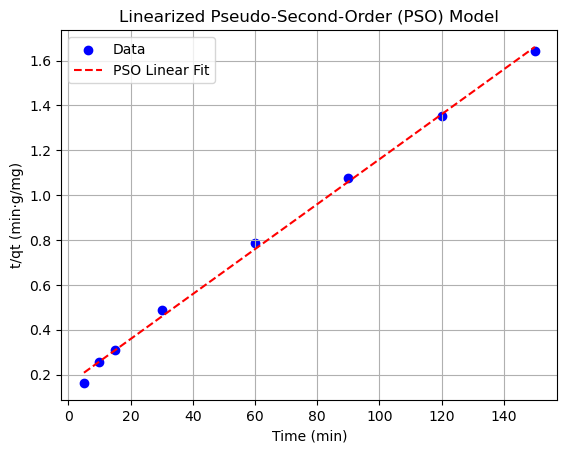

IPD: kid = 6.107 mg/g/min^0.5, C = 22.84 mg/g, R² = 0.959


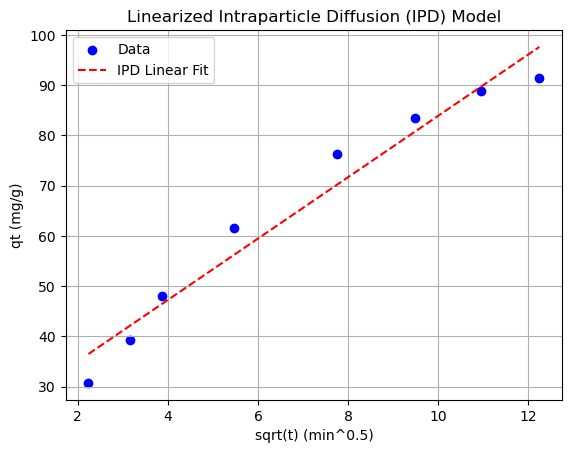

In [9]:
# Fit and visualize PFO model
qe_pfo, k1, R2_pfo = pfo_fit(t, qt_s)
print("MSN-SH")
print(f"PFO: qe = {qe_pfo:.2f} mg/g, k1 = {k1:.3f} 1/min, R² = {R2_pfo:.3f}")
pfo_plot(t, qt_s, qe_pfo, k1)

# Fit and visualize PSO model
qe_pso, k2, R2_pso = pso_linear_fit(t, qt_s)
print(f"PSO: qe = {qe_pso:.2f} mg/g, k2 = {k2:.3f} g/mg/min, R² = {R2_pso:.3f}")
pso_linear_plot(t, qt_s, qe_pso, k2)

# Fit and visualize IPD model
kid, C, R2_ipd = ipd_linear_fit(t, qt_s)
print(f"IPD: kid = {kid:.3f} mg/g/min^0.5, C = {C:.2f} mg/g, R² = {R2_ipd:.3f}")
ipd_linear_plot(t, qt_s, kid, C)

# MSN

MSN - bare
PFO: qe = 41.95 mg/g, k1 = 0.120 1/min, R² = 0.787


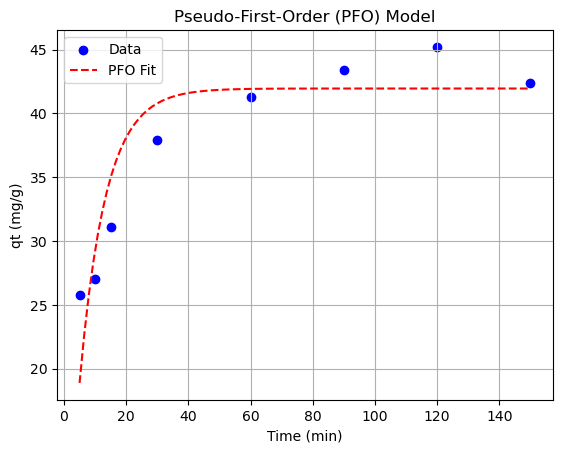

PSO: qe = 45.24 mg/g, k2 = 0.004 g/mg/min, R² = 0.997


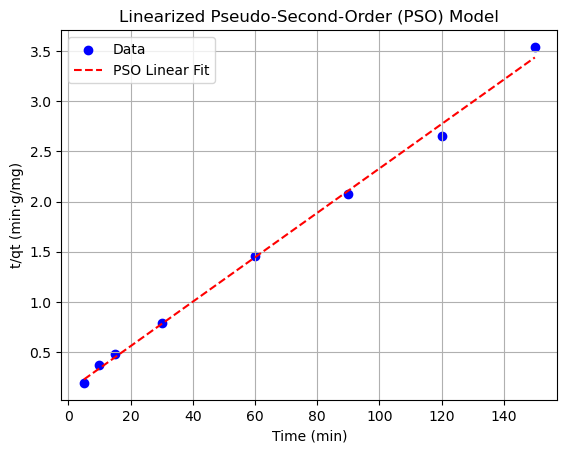

IPD: kid = 1.899 mg/g/min^0.5, C = 23.66 mg/g, R² = 0.858


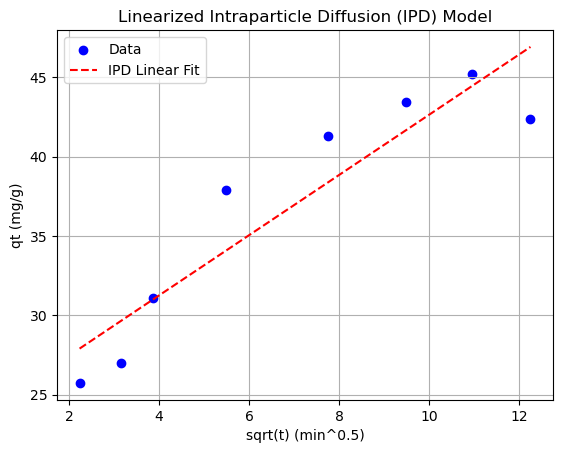

In [10]:
# Fit and visualize PFO model
qe_pfo, k1, R2_pfo = pfo_fit(t, qt_n)
print("MSN - bare")
print(f"PFO: qe = {qe_pfo:.2f} mg/g, k1 = {k1:.3f} 1/min, R² = {R2_pfo:.3f}")
pfo_plot(t, qt_n, qe_pfo, k1)

# Fit and visualize PSO model
qe_pso, k2, R2_pso = pso_linear_fit(t, qt_n)
print(f"PSO: qe = {qe_pso:.2f} mg/g, k2 = {k2:.3f} g/mg/min, R² = {R2_pso:.3f}")
pso_linear_plot(t, qt_n, qe_pso, k2)

# Fit and visualize IPD model
kid, C, R2_ipd = ipd_linear_fit(t, qt_n)
print(f"IPD: kid = {kid:.3f} mg/g/min^0.5, C = {C:.2f} mg/g, R² = {R2_ipd:.3f}")
ipd_linear_plot(t, qt_n, kid, C)

# Kinetic for Methyl orange dye

### Let's start by importing the data

In [ ]:
def pso_model(t, qe, k2):
    """
    Pseudo-Second-Order (PSO) kinetic model.
    Inputs:
        t (array): Time (min).
        qe (float): Equilibrium adsorption capacity (mg/g).
        k2 (float): PSO rate constant (g/mg/min).
    Returns:
        qt (array): Adsorbed amount at time t (mg/g).
    """
    return (qe**2 * k2 * t) / (1 + qe * k2 * t)


def pso_fit(t, qt):
    """
    Fits adsorption kinetic data to the PSO model.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
    Returns:
        qe (float): Equilibrium adsorption capacity (mg/g).
        k2 (float): PSO rate constant (g/mg/min).
        R2 (float): Coefficient of determination.
    """
    # Initial guesses for qe and k2
    qe_guess = max(qt)
    k2_guess = 0.01

    # Perform non-linear least squares fitting
    params, _ = curve_fit(pso_model, t, qt, p0=[qe_guess, k2_guess])
    qe, k2 = params

    # Calculate R²
    qt_pred = pso_model(np.array(t), qe, k2)
    ss_res = np.sum((np.array(qt) - qt_pred) ** 2)
    ss_tot = np.sum((np.array(qt) - np.mean(qt)) ** 2)
    R2 = 1 - (ss_res / ss_tot)

    return qe, k2, R2


def pso_plot(t, qt, qe, k2):
    """
    Plots the PSO model fit.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
        qe (float): Equilibrium adsorption capacity (mg/g).
        k2 (float): PSO rate constant (g/mg/min).
    """
    t_fit = np.linspace(min(t), max(t), 100)
    qt_fit = pso_model(t_fit, qe, k2)

    plt.scatter(t, qt, color='blue', label='Data')
    plt.plot(t_fit, qt_fit, 'r--', label='PSO Fit')
    plt.xlabel('Time (min)')
    plt.ylabel('qt (mg/g)')
    plt.title('Pseudo-Second-Order (PSO) Model')
    plt.legend()
    plt.grid()
    plt.show()


# ================================================================
# Intraparticle Diffusion (IPD) Model
# ================================================================

def ipd_model(t, kid, C):
    """
    Intraparticle Diffusion (IPD) kinetic model.
    Inputs:
        t (array): Time (min).
        kid (float): IPD rate constant (mg/g/min^0.5).
        C (float): Intercept related to boundary layer thickness (mg/g).
    Returns:
        qt (array): Adsorbed amount at time t (mg/g).
    """
    return kid * np.sqrt(t) + C


def ipd_fit(t, qt):
    """
    Fits adsorption kinetic data to the IPD model.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
    Returns:
        kid (float): IPD rate constant (mg/g/min^0.5).
        C (float): Intercept related to boundary layer thickness (mg/g).
        R2 (float): Coefficient of determination.
    """
    # Perform linear regression on sqrt(t) vs. qt
    x = np.sqrt(t)
    slope, intercept = np.polyfit(x, qt, 1)
    kid = slope
    C = intercept

    # Calculate R²
    qt_pred = ipd_model(np.array(t), kid, C)
    ss_res = np.sum((np.array(qt) - qt_pred) ** 2)
    ss_tot = np.sum((np.array(qt) - np.mean(qt)) ** 2)
    R2 = 1 - (ss_res / ss_tot)

    return kid, C, R2


def ipd_plot(t, qt, kid, C):
    """
    Plots the IPD model fit.
    Inputs:
        t (array): Time (min).
        qt (array): Adsorbed amount at time t (mg/g).
        kid (float): IPD rate constant (mg/g/min^0.5).
        C (float): Intercept related to boundary layer thickness (mg/g).
    """
    x = np.sqrt(t)
    y = np.array(qt)
    y_fit = kid * x + C

    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, y_fit, 'r--', label='IPD Fit')
    plt.xlabel('sqrt(t) (min^0.5)')
    plt.ylabel('qt (mg/g)')
    plt.title('Intraparticle Diffusion (IPD) Model')
    plt.legend()
    plt.grid()
    plt.show()